---
title: "Toronto Apartment Building Age"
description: "Using legal data to chart apartment construction trends and building age"
author: "Simon Wallace"
date: "10/21/2022"
image: map.png
---


## Charting apartment constructions booms and busts

When were Toronto apartment buildings constructed and how have trends in density changed over time? In this notebook I present visualizations answering these questions. My main goal is to show how Python and computational approaches to research can be simply, quickly, and effecitively leveraged to answer important questions.

### The problem
Almost [50% of Torontonians live](https://www.cbc.ca/news/canada/toronto/toronto-highrise-living-by-the-numbers-1.4127019) in rental units. The age of those units matters: older units may require more maintenance and if new units are not being built housing stock might age out. Can we programmatically develop an understanding of the age, nature, and geographic distribution of Toronto's apartment buildings?

### The dataset
In 2017, the City of Toronto launched the [RentSafeTO](https://www.toronto.ca/community-people/housing-shelter/rental-housing-tenant-information/rental-housing-standards/apartment-building-standards/) program. Its object is ensure that tenants live in "safe, well-maintained buildings" by subjecting properties to regular inspections. Owners of properties that fail to meet City of Toronto standards face financial penalities for non-compliance.

The City reports on its enforcement and inspection efforts through its [open data portal](https://open.toronto.ca/dataset/apartment-building-registration/). The dataset includes, *inter alia*, information about:

- the size of buildings,
- outcomes of inspections,
- the scores of each inspection,
- the location of each building, and
- the height of each building.

### Using the data
To explore the data, we are going to use two popular libraries: pandas and seaborn.

In [ ]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so

We begin by loading the information from the City of Toronto.

In [ ]:
df = pd.read_csv('https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/4ef82789-e038-44ef-a478-a8f3590c3eb1/resource/979fb513-5186-41e9-bb23-7b5cc6b89915/download/Apartment%20Building%20Evaluation.csv')

This gives us a dataframe (a 'df'), which is basically a spreadsheet. Let's take a look at the first three rows:

In [ ]:
df.head(3)

,_id,RSN,YEAR_REGISTERED,YEAR_EVALUATED,YEAR_BUILT,PROPERTY_TYPE,WARD,WARDNAME,SITE_ADDRESS,CONFIRMED_STOREYS,...,EXTERIOR_WALKWAYS,BALCONY_GUARDS,WATER_PEN_EXT_BLDG_ELEMENTS,PARKING_AREA,OTHER_FACILITIES,GRID,LATITUDE,LONGITUDE,X,Y
0,1577658,4155099,2017.0,NaN,1951.0,PRIVATE,5,York South-Weston,60 CLEARVIEW HTS,4,...,4.0,4.0,5.0,3.0,NaN,W0532,43.692977,-79.481347,306287.792,4839003.552
1,1577659,4154772,2017.0,NaN,1989.0,SOCIAL HOUSING,16,Don Valley East,7 THE DONWAY E,4,...,5.0,5.0,4.0,4.0,5.0,N1627,43.733247,-79.339561,317708.903,4843488.607
2,1577660,4153788,2019.0,NaN,1962.0,PRIVATE,15,Don Valley West,365 EGLINTON AVE E,7,...,4.0,4.0,5.0,4.0,NaN,N1530,43.709092,-79.385527,314009.544,4840800.059


This is a big dataset:

In [ ]:
print(f'The spreadsheet is {df.shape[0]} rows by {df.shape[1]} columns.')
print(f'Here is a list of all the columns:')
print(df.columns)

The spreadsheet is 10371 rows by 40 columns.
Here is a list of all the columns:
Index(['_id', 'RSN', 'YEAR_REGISTERED', 'YEAR_EVALUATED', 'YEAR_BUILT',
       'PROPERTY_TYPE', 'WARD', 'WARDNAME', 'SITE_ADDRESS',
       'CONFIRMED_STOREYS', 'CONFIRMED_UNITS', 'EVALUATION_COMPLETED_ON',
       'SCORE', 'RESULTS_OF_SCORE', 'NO_OF_AREAS_EVALUATED', 'ENTRANCE_LOBBY',
       'ENTRANCE_DOORS_WINDOWS', 'SECURITY', 'STAIRWELLS', 'LAUNDRY_ROOMS',
       'INTERNAL_GUARDS_HANDRAILS', 'GARBAGE_CHUTE_ROOMS',
       'GARBAGE_BIN_STORAGE_AREA', 'ELEVATORS', 'STORAGE_AREAS_LOCKERS',
       'INTERIOR_WALL_CEILING_FLOOR', 'INTERIOR_LIGHTING_LEVELS', 'GRAFFITI',
       'EXTERIOR_CLADDING', 'EXTERIOR_GROUNDS', 'EXTERIOR_WALKWAYS',
       'BALCONY_GUARDS', 'WATER_PEN_EXT_BLDG_ELEMENTS', 'PARKING_AREA',
       'OTHER_FACILITIES', 'GRID', 'LATITUDE', 'LONGITUDE', 'X', 'Y'],
      dtype='object')


I've poked around and noticed that there are some duplicate entries because some buildings were inspected multiple times. To get a cleaner dataset, we will eliminate duplicate entries. After looking at the dataset's [data dictionary](https://open.toronto.ca/dataset/apartment-building-registration/) I learned that the 'RSN' is a unique number assigned to each building. We will drop any duplicate RSN rows and then isolate for a few columns.

In [ ]:
df.sort_values(by=['YEAR_EVALUATED'])
df.drop_duplicates(subset=['RSN'], inplace=True, keep='last')

I am only interested in a few columns, so I will drop everything that isn't directly relevant.

In [ ]:
df = df[['YEAR_BUILT','CONFIRMED_STOREYS','CONFIRMED_UNITS','X', 'Y']]

In [ ]:
df.shape

(3482, 5)

Wow! That eliminated a lot of information. Now our dataset describes 3482 apartment buildings. We can get some summary information:

In [ ]:
df['YEAR_BUILT'].describe()

count    3463.000000
mean     1961.985850
std        19.281208
min      1805.000000
25%      1955.000000
50%      1962.000000
75%      1970.000000
max      2021.000000
Name: YEAR_BUILT, dtype: float64

This is interesting! The average building is about 60 years old, the oldest building was built in 1805, and 68% of apartment buildings in Toronto were contructed between 1943 and 1981.

## Visualize the Data

Let's get a better feel for what's in the dataset by visualizing it. We will begin by plotting the coorindates of each building onto a scatter plot. I've coded the program to output larger points for buildings with more units.

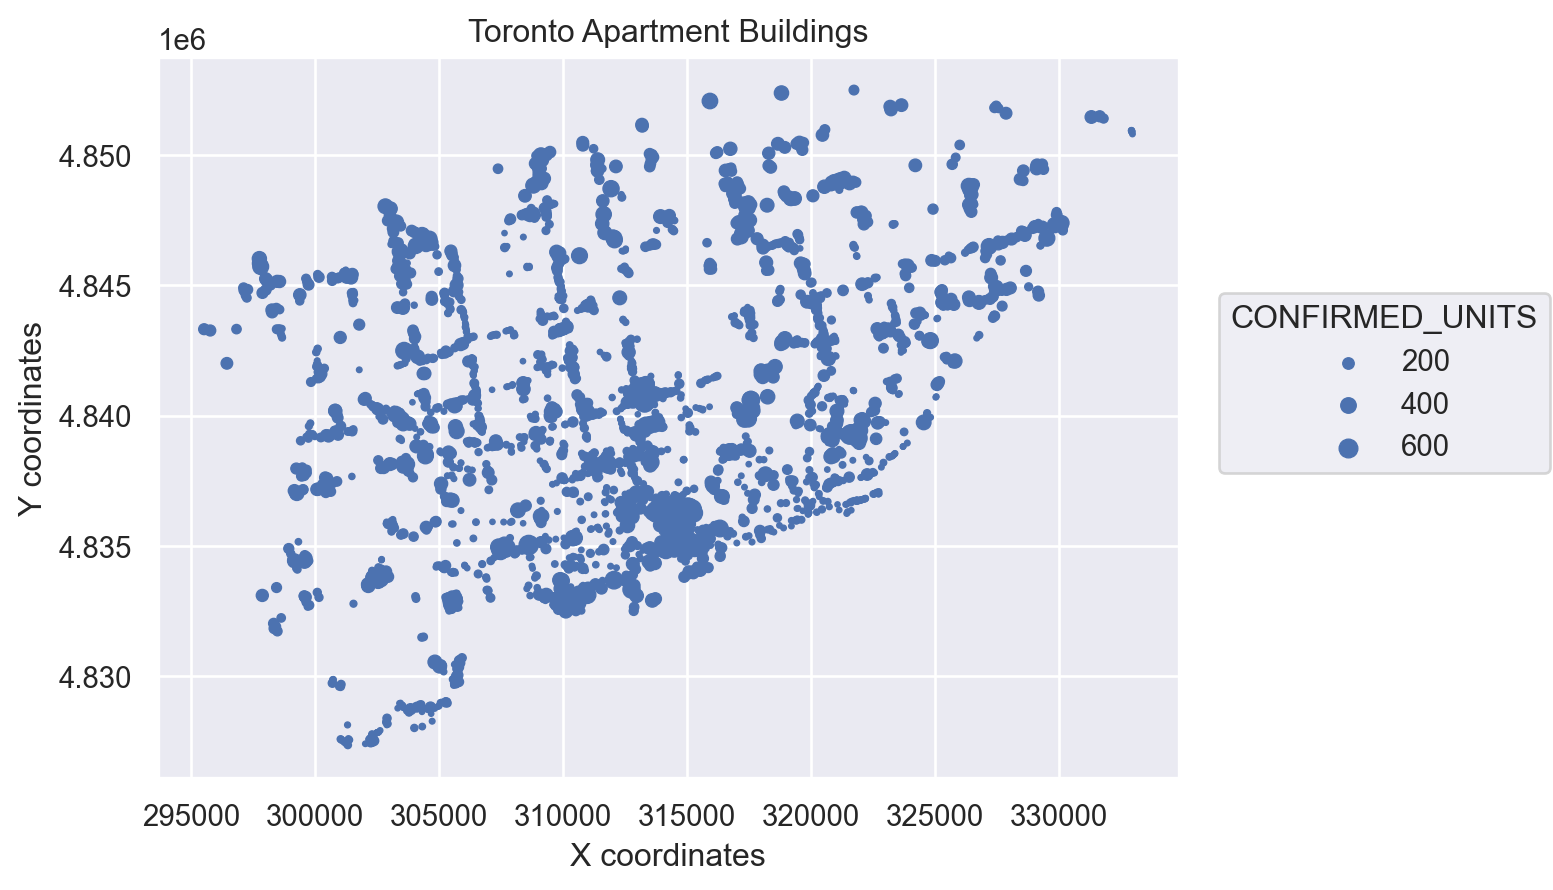

In [ ]:
(
    so.Plot(df, x="X", y="Y", pointsize='CONFIRMED_UNITS')
    .add(so.Dot())
    .label(
        x='X coordinates',
        y='Y coordinates',
        title='Toronto Apartment Buildings')
)

This appears to show --- and this passes the gut check --- that the tallest apartment buuildings are clustered downtown and that apartment buildings are spread out along major arteries.

Now let's visualize the age of the buildings.

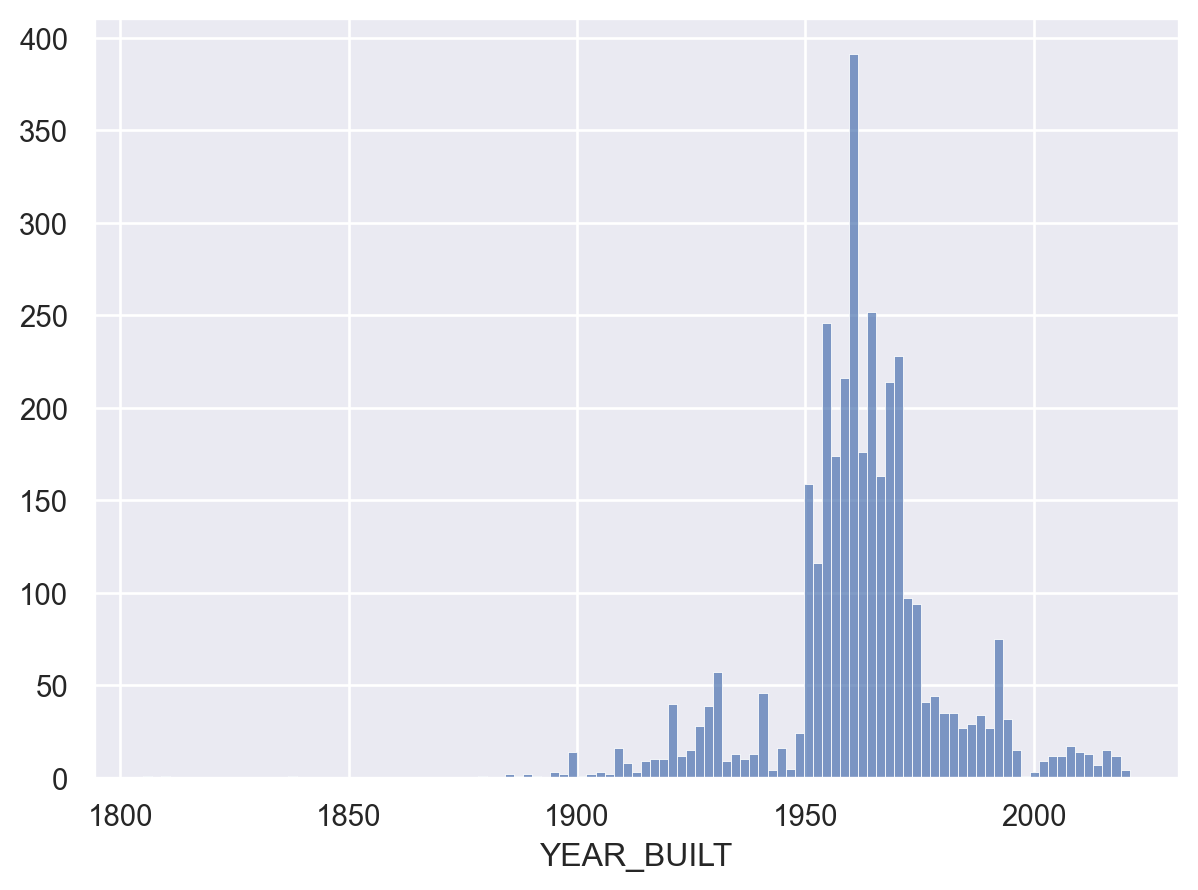

In [ ]:
(
    so.Plot(df, x="YEAR_BUILT")
    .add(so.Bars(), so.Hist())
)

This shows a huge building boom in the 50s and 60s, that suddenly dropped off in the 70s. But do fewer new buildings mean fewer new units? Let's check by manipulating the data a bit. This next graph will visulize the total number of units built each year:

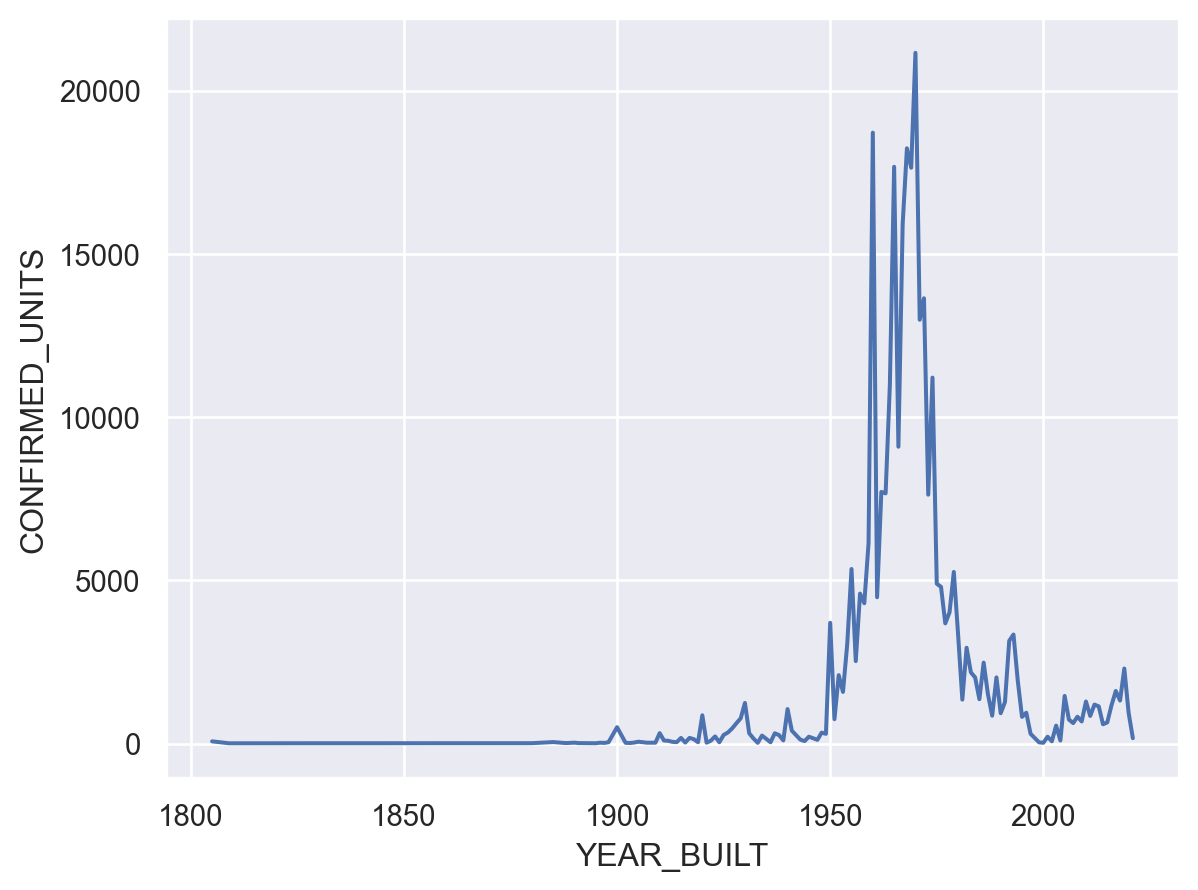

In [ ]:
units_per_year = df.groupby('YEAR_BUILT')["CONFIRMED_UNITS"].sum().to_frame()
so.Plot(units_per_year, x='YEAR_BUILT', y='CONFIRMED_UNITS').add(so.Line())

This more or less correlates with the total number of buildings built. But have the buildings changed? Let's look to see what the average number of units for a building built each year is:

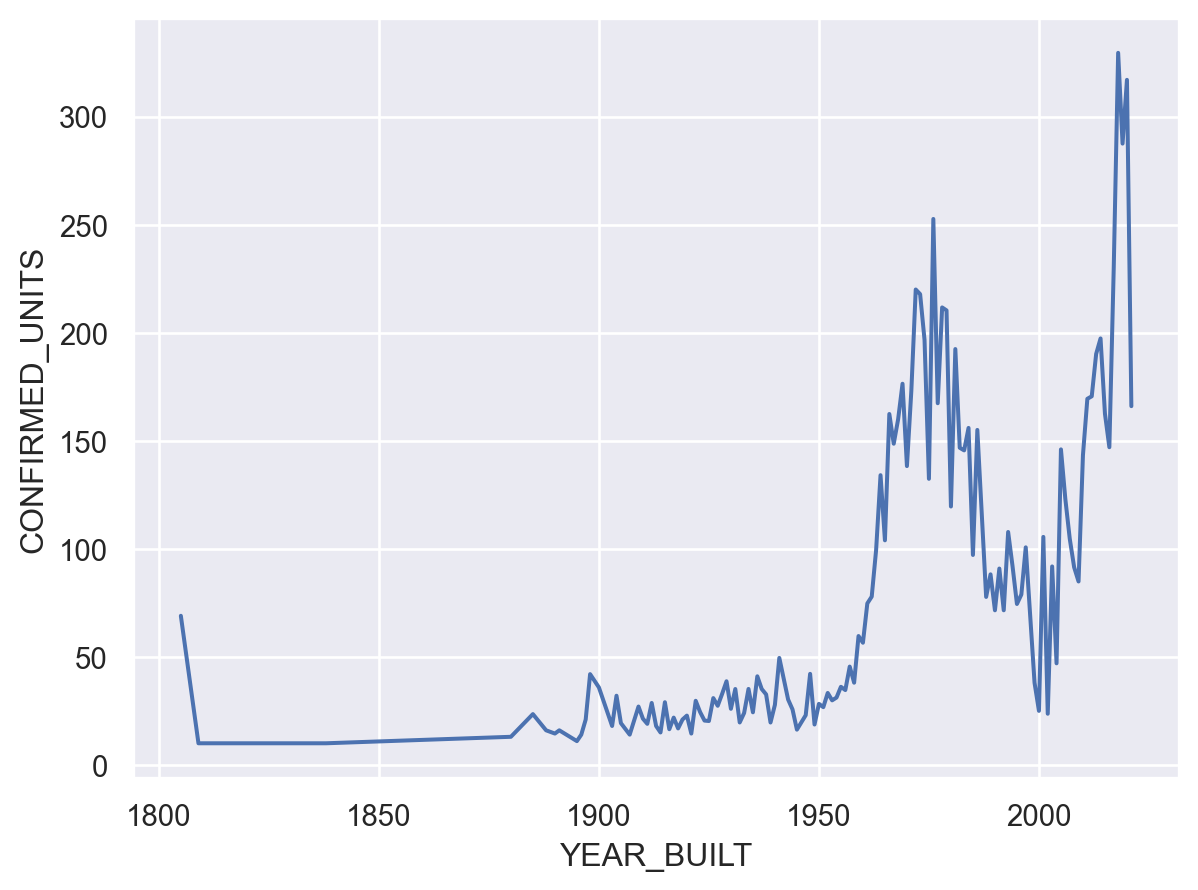

In [ ]:
average_units_per_building_per_year = df.groupby('YEAR_BUILT')["CONFIRMED_UNITS"].mean().to_frame()
so.Plot(average_units_per_building_per_year, x='YEAR_BUILT', y='CONFIRMED_UNITS').add(so.Line())

This is really interesting! From 1960 to 2000, the average number of units in a new build steadily decresed, only to suddenly rebound and later climb.

## Questions for future research

These visualizations leave me with more questions than answers. What happened in 2000 that encouraged developers to build apartment buildings with more units? Do taller buildings portend a meaningful increase in available rental housing stock in Toronto or, at the 1960s would suggest, is the only way to increase the number of rental units to build more buildings?